<a href="https://colab.research.google.com/github/cchin711213/GPsimulation/blob/main/GP_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

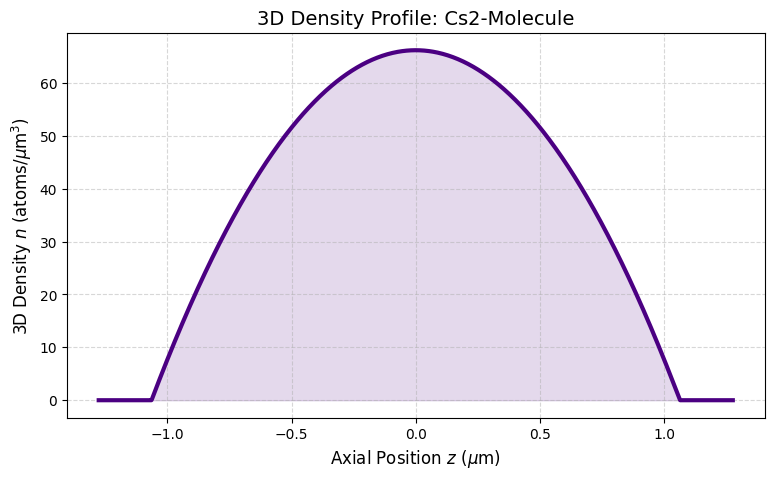

=========== PARAMETER REPORT ===========
------------Input Parameters------------
Species:           Cs2-Molecule
Atom Number (N):   30,000
Scattering (a_s):  200 a0
Frequencies (Hz):  fx=10.0, fy=10.0, fz=150.0
Trap Aspect Ratio: 15.00

-----------Simulation Results-----------
Chem. Potential:   334.60 Hz
Peak 3D Density:   66.162768 atoms/µm³
TF Radius Rx:      15.95 µm
TF Radius Ry:      15.95 µm
TF Radius Rz:      1.06 µm


In [12]:
# @title 3D BEC Thomas-Fermi Profiler { run: "auto" }
import numpy as np
import matplotlib.pyplot as plt

# --- 1. User Input Parameters (Colab Forms) ---
Species = "Cs2-Molecule" # @param ["Li-7", "Na-23", "K-39", "Cs-133", "Cs2-Molecule"]
N_atoms = 30000 # @param {type:"slider", min:1000, max:500000, step:1000}
f_x = 10.0 # @param {type:"number"}
f_y = 10.0 # @param {type:"number"}
f_z = 150.0 # @param {type:"number"}
a_bohr = 200 # @param {type:"slider", min:0, max:1000, step:5}

# --- 2. Physical Constants ---
hbar = 1.0545718e-34
m_u = 1.6605390e-27
a0 = 5.2917721e-11

# --- 3. Species-Specific Mass Logic ---
# Masses in atomic mass units (u)
species_masses = {
    "Li-7": 7.01600,
    "Na-23": 22.98977,
    "K-39": 38.96370,
    "Cs-133": 132.90545,
    "Cs2-Molecule": 132.90545 * 2  # Double the mass of Cesium-133
}

mass = species_masses[Species] * m_u
a_s = a_bohr * a0
omega = 2 * np.pi * np.array([f_x, f_y, f_z])
omega_mean = np.prod(omega)**(1/3)

# --- 4. Thomas-Fermi Calculations ---
g = 4 * np.pi * hbar**2 * a_s / mass
a_ho = np.sqrt(hbar / (mass * omega_mean))
mu = (hbar * omega_mean / 2) * (15 * N_atoms * a_s / a_ho)**(2/5)

# TF Radii (microns)
R = np.sqrt(2 * mu / (mass * omega**2)) * 1e6

# Peak Density (atoms/micron^3)
n0_si = mu / g if g != 0 else 0
n0_um3 = n0_si * 1e-18

# --- 5. Plotting ---
z_axis = np.linspace(-R[2]*1.2, R[2]*1.2, 1000)
density_z = n0_um3 * np.maximum(0, 1 - (z_axis/R[2])**2)

fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(z_axis, density_z, lw=3, color='indigo')
ax.fill_between(z_axis, density_z, color='indigo', alpha=0.15)

ax.set_title(f"3D Density Profile: {Species}", fontsize=14)
ax.set_xlabel(r"Axial Position $z$ ($\mu$m)", fontsize=12)
ax.set_ylabel(r"3D Density $n$ (atoms/$\mu$m$^3$)", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
plt.show()

# --- 6. Streamlined Report ---
print(f"{' PARAMETER REPORT ':=^40}")
print(f"{'Input Parameters':-^40}")
print(f"Species:           {Species}")
print(f"Atom Number (N):   {N_atoms:,}")
print(f"Scattering (a_s):  {a_bohr} a0")
print(f"Frequencies (Hz):  fx={f_x}, fy={f_y}, fz={f_z}")
print(f"Trap Aspect Ratio: {f_z/f_x:.2f}")

print(f"\n{'Simulation Results':-^40}")
print(f"Chem. Potential:   {mu/(hbar*2*np.pi):.2f} Hz")
# Regular decimal format for peak density
print(f"Peak 3D Density:   {n0_um3:.6f} atoms/µm³")
print(f"TF Radius Rx:      {R[0]:.2f} µm")
print(f"TF Radius Ry:      {R[1]:.2f} µm")
print(f"TF Radius Rz:      {R[2]:.2f} µm")